In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
data = pd.read_csv(r"C:\Users\Ben\Documents\Fairbnb\data\clean_data.csv")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 47 columns):
Unnamed: 0                   5536 non-null int64
Unnamed: 0.1                 5536 non-null int64
access                       5536 non-null object
accommodates                 5536 non-null int64
address                      5536 non-null object
bathrooms                    5536 non-null float64
bed_type                     5536 non-null object
bedrooms                     5536 non-null float64
beds                         5536 non-null float64
calendar_last_scraped        5536 non-null object
cancellation_policy          5536 non-null object
cleaning_fee                 5536 non-null float64
description                  5536 non-null object
extra_people                 5536 non-null float64
guests_included              5536 non-null int64
house_rules                  3266 non-null object
images                       5536 non-null object
interaction                  3070 non-null

In [83]:
#data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)

In [66]:
data.drop('address', axis=1, inplace=True)

In [84]:
new_data = data[['price','accommodates','bathrooms','bed_type','bedrooms','beds', 
                'city','state','country','government_area','review_scores_rating']]

In [86]:
dummies = pd.get_dummies(new_data, columns=['bed_type','city','state','government_area','country'])

In [87]:
#cols = ['bed_type','city','state','government_area']

In [88]:
new_df = dummies

Remove the outliers prices

In [89]:
new_df['new_prices'] = new_df[new_df['price']<1000]['price']

Remove NaNs

In [90]:
new_df.dropna(inplace=True)

Get our target variable 

In [91]:
y = new_df['new_prices']

In [92]:
y.shape

(5336,)

Get our X features

In [93]:
X = new_df.drop('new_prices',axis=1)

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5336 entries, 0 to 5534
Columns: 553 entries, price to country_ 'United States'
dtypes: float64(4), int64(2), uint8(547)
memory usage: 3.1 MB


# Random Forest Regressor

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [96]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=12)

In [97]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12, verbose=0,
                      warm_start=False)

In [98]:
predictions = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

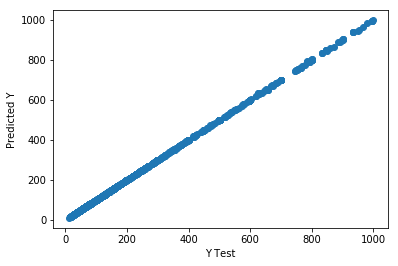

In [99]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [100]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 0.20768269831355457
MSE: 0.6510243597751416
RMSE: 0.8068608057001787
R2: 0.9999841136395269


## With Cross Validation

In [101]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [102]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [103]:
scores = cross_val_score(regressor, X, y, cv=5)

In [104]:
scores

array([0.99998321, 0.99999266, 0.99999158, 0.99998067, 0.99999258])

### With ShuffleSplit 

In [105]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cross_val_score(regressor, X, y, cv=cv)

array([0.99998771, 0.99997666, 0.99998386, 0.99998789, 0.99998438,
       0.99998745, 0.99998375, 0.99998409, 0.99998389, 0.99998717])

Also with cross validation, our model is extremely accurate

# Make Pipeline

In [106]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = regressor.fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
regressor.score(X_test_transformed, y_test)

0.9999729984117793

In [108]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=10,random_state=12))
cross_val_score(pipeline, X, y, cv=cv)

array([0.99998727, 0.99997446, 0.99998394, 0.99998556, 0.99998673,
       0.99998742, 0.99998355, 0.99998407, 0.99998382, 0.99998651])